#Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Algorithm

In [ ]:
###help function to find nearest upper power of 2
###for example, if given n is 5, this function will find 8 which is 2^3
def nearPowerOf2(n):
    p = 1
    if (n and not(n & (n - 1))):
        return n
    while (p < n) :
        p <<= 1    
    return p;

In [ ]:
###our FFT algorithm using recursion
###length of input x(array or list) has to be power of 2
def FFT(x):
    N=len(x)
    #corner case
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
                           [X_even+factor[:int(N/2)]*X_odd, 
                            X_even+factor[int(N/2):]*X_odd])
        return X

In [ ]:
###create some data to test our FFT algorithm
x=[2,6,8,5]
update_len=nearPowerOf2(len(x))
# print(update_len)
for i in range(update_len-len(x)):
  x.append(0)

print(x,len(x))
X1=FFT(x)
print('Our FFT\n',X1)

[2, 6, 8, 5] 4
Our FFT
 [21.+0.00000000e+00j -6.-1.00000000e+00j -1.-1.34711148e-15j
 -6.+1.00000000e+00j]


In [ ]:
###compare our result with numpy fft
from numpy.fft import fft, ifft
X_new=fft(x)
print('Numpy FFT\n',X_new)

Numpy FFT
 [21.+0.j -6.-1.j -1.+0.j -6.+1.j]


In [ ]:
###create some data to test our FFT algorithm
x=[2,6,8,5,7]
update_len=nearPowerOf2(len(x))
# print(update_len)
for i in range(update_len-len(x)):
  x.append(0)

print(x,len(x))
X1=FFT(x)
print('Our FFT\n',X1)

[2, 6, 8, 5, 7, 0, 0, 0] 8
Our FFT
 [28.        +0.00000000e+00j -4.29289322-1.57781746e+01j
  1.        -1.00000000e+00j -5.70710678+2.21825407e-01j
  6.        -1.34711148e-15j -5.70710678-2.21825407e-01j
  1.        +1.00000000e+00j -4.29289322+1.57781746e+01j]


In [ ]:
###compare our result with numpy fft
from numpy.fft import fft, ifft
X_new=fft(x)
print('Numpy FFT\n',X_new)

Numpy FFT
 [28.         +0.j         -4.29289322-15.77817459j
  1.         -1.j         -5.70710678 +0.22182541j
  6.         +0.j         -5.70710678 -0.22182541j
  1.         +1.j         -4.29289322+15.77817459j]


Comparing the output from above two cells, my FFT algorithm has the same output as numpy fft.

#Root mean square error

In [ ]:
n=10
length=2**n
x_rand=np.random.randint(1,100, size=length)
print('random array size:',x_rand.shape)
x1=FFT(x_rand) #our FFT result
print('our FFT output size:',x1.shape)
x2=fft(x_rand) #numpy fft result
print('numpy FFT output size:',x2.shape)
MSE = np.square(np.subtract(x1,x2)).mean()

RMSE = np.sqrt(MSE)
print("\nRoot Mean Square Error:")
print(RMSE)

random array size: (1024,)
our FFT output size: (1024,)
numpy FFT output size: (1024,)

Root Mean Square Error:
(1.8380164342783173e-13+2.154111796535075e-14j)


#Runtime

In [ ]:
###helper function to execute FFT and record how much time does it take
import time
def RunAndTime(input_signal):
  start=time.time()
  x_fft=FFT(input_signal)
  end=time.time()
  t=end-start
  return x_fft,t

In [ ]:
###helper function to segment array with increasing power of n from a 'very long' array
###for example
###1st array has length of 2
###2nd array has length of 4
###3rd array has length of 8......
def segment(lst,n):
    if(2**n<=len(lst)):
        for i in range(n):
          if i==0:
            # print(0,2**(i+1))
            seg=lst[0:2**i]
            seg_list.append(seg)
          elif i>=1:
            # print(2**i,2**(i+1))
            seg=lst[2**i:2**(i+1)]
            seg_list.append(seg)

# seg_list=[]
# t_list=[]
# length=2**15
# x_rand=np.random.randint(1,100, size=length)
# segment(x_rand,15)
# print(len(seg_list),seg_list)

In [ ]:
###create blank seg_list to store segmented array
###create blank t_list to store runtime of applying FFT on each segment
seg_list=[]
t_list=[]
n=20
length=2**n
x_rand=np.random.randint(1,100, size=length)
segment(x_rand,n)
for s in seg_list:
  x_fft,t=RunAndTime(s)
  t_list.append(t)
# print(len(x_rand_fft))
print(len(t_list),t_list)

20 [2.384185791015625e-06, 7.462501525878906e-05, 4.696846008300781e-05, 0.00010418891906738281, 0.0002281665802001953, 0.000537872314453125, 0.001306772232055664, 0.002157926559448242, 0.0035927295684814453, 0.007768392562866211, 0.01516103744506836, 0.02831101417541504, 0.06291389465332031, 0.11870217323303223, 0.23262810707092285, 0.4773588180541992, 0.9697654247283936, 1.9379911422729492, 3.8424198627471924, 7.730583190917969]


In [ ]:
###use numpy to calculate time cost divided by nlogn
t=2**np.arange(n)
print(t)
divide_log=t_list/(t*np.log2(t)) 
print(len(divide_log),divide_log)
# x=t*np.log2(t)
# x=np.delete(x,1)
# x[0]=0
# print(len(x),x)

[     1      2      4      8     16     32     64    128    256    512
   1024   2048   4096   8192  16384  32768  65536 131072 262144 524288]
20 [           inf 3.73125076e-05 5.87105751e-06 4.34120496e-06
 3.56510282e-06 3.36170197e-06 3.40305269e-06 2.40840018e-06
 1.75426248e-06 1.68584908e-06 1.48057006e-06 1.25670340e-06
 1.27998646e-06 1.11461626e-06 1.01417806e-06 9.71189002e-07
 9.24840379e-07 8.69747001e-07 8.14314919e-07 7.76048278e-07]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


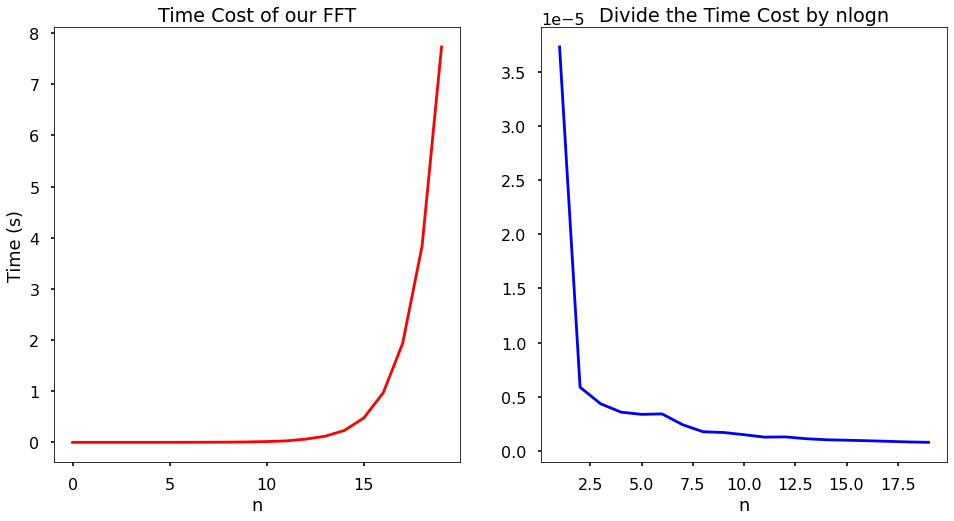

In [ ]:
###check if my FFT algorithm runs in O(nlogn) by plotting them
  #subplot 1, shows runtime for my FFT algorithm as n increases
plt.style.use('seaborn-poster')
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.title('Time Cost of our FFT')
plt.plot(t_list, 'r')

  #subplot 2, shows divide time cost by nlogn will approach constant
plt.subplot(122)
plt.xlabel('n')
plt.title('Divide the Time Cost by nlogn')
plt.plot(divide_log, 'b')

plt.show()

First, as n increases, the y-axis is in unit of 1e-5. <br>
Second, after n becomes larger than 10, the curve becomes flat.<br> 
Therefore, we can see that FFT runs in O(nlogn).

#Application
#! ! ! Warning ! ! !
Please upload data to file space manually before running these sections below.
<br>To do this, go to the icon that look like a folder on the sidebar to the left. Drag the '.mat' file and release. 
<br>Now we are good to go.

In [ ]:
###Now, apply some real world data and apply our FFT!

In [ ]:
###load our data
import scipy.io as sio
mat_fname='/content/AvgDailyTemperature.mat'
mat_contents = sio.loadmat(mat_fname)
print(sorted(mat_contents.keys()))
print('Atlanta',len(mat_contents['a']))
print('Boston',len(mat_contents['b']))
print('Miami',len(mat_contents['m']))
print('New York',len(mat_contents['n']))
print('Providence',len(mat_contents['p']))
print('Washington DC',len(mat_contents['w']))

['__globals__', '__header__', '__version__', 'a', 'b', 'm', 'n', 'p', 'w']
Atlanta 7670
Boston 7670
Miami 7670
New York 7670
Providence 7670
Washington DC 7670


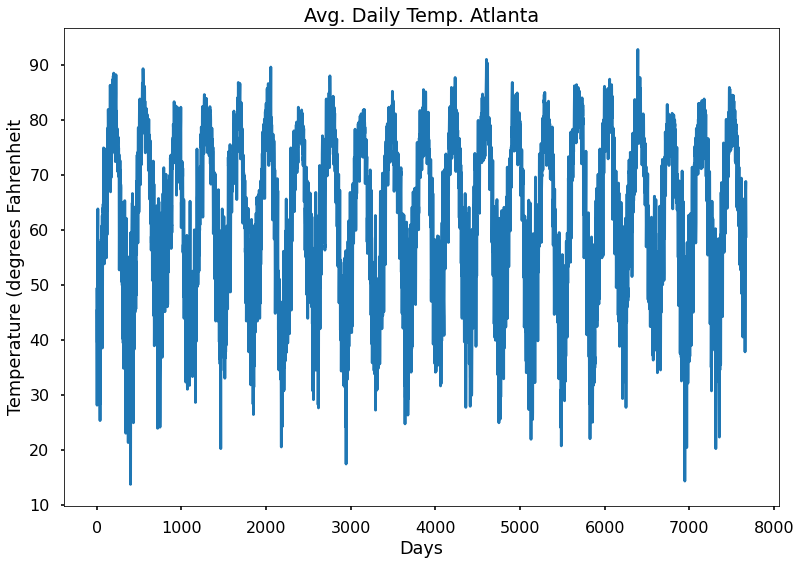

In [ ]:
###transform data from 1-D numpy arrays to lists
atlanta = []
boston = []
miami = []
newyork = []
providence = []
dc =[]
for i in range(len(mat_contents['a'])):
  atlanta.append(mat_contents['a'][i][0])
  boston.append(mat_contents['b'][i][0])
  miami.append(mat_contents['m'][i][0])
  newyork.append(mat_contents['n'][i][0])
  providence.append(mat_contents['p'][i][0])
  dc.append(mat_contents['w'][i][0])
###plot Atlanta data
plt.plot(atlanta)
plt.title("Avg. Daily Temp. Atlanta")
plt.xlabel("Days")
plt.ylabel("Temperature (degrees Fahrenheit")
plt.show()

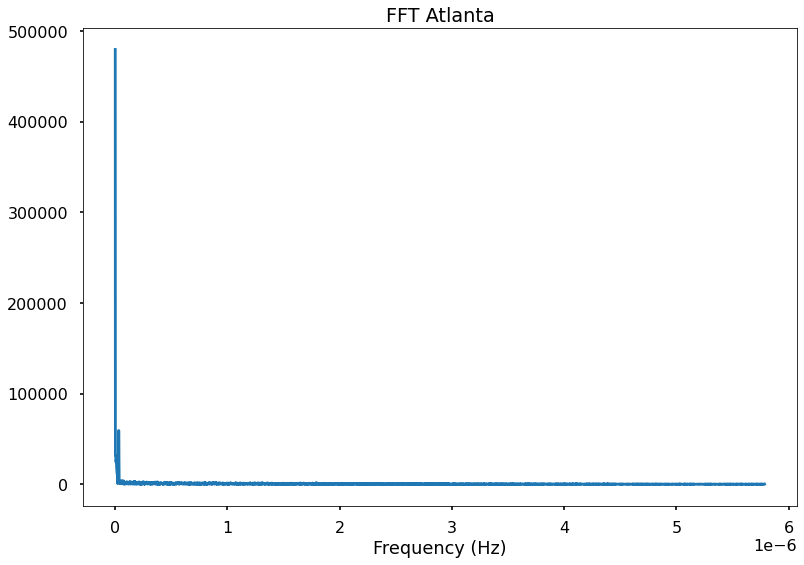

In [ ]:
###round up length to nearest power of 2
update_len=nearPowerOf2(len(atlanta))
for i in range(update_len-len(atlanta)):
  atlanta.append(0)
###apply fft
fftdata = FFT(atlanta)
Fs = 1/(60*60*24)
N = len(fftdata)
T = N/Fs
freq = np.arange(N)/T
halfn = N//2
half_freq = freq[:halfn]
###plot fft
plt.plot(half_freq, np.abs(fftdata[:halfn]))
plt.title("FFT Atlanta")
plt.xlabel("Frequency (Hz)")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


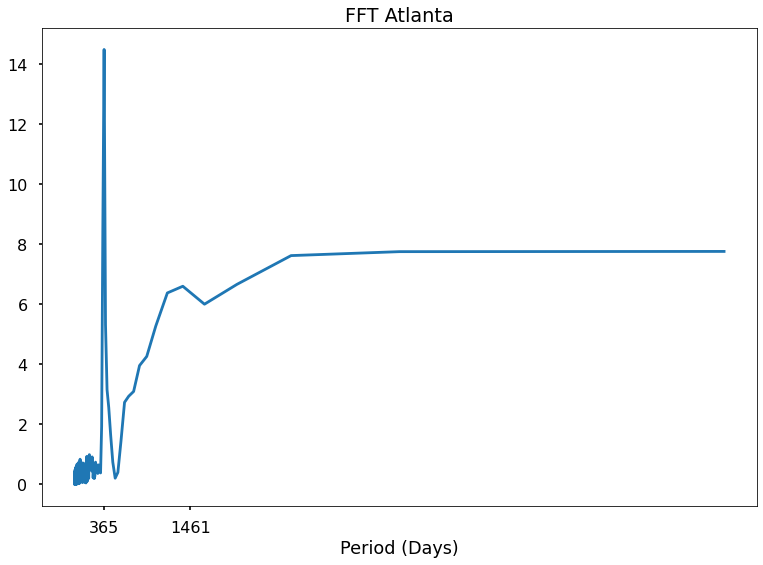

In [ ]:
###convert frequency to days
Tnew=1/half_freq/(60*60*24)
###plot with new frequency
plt.plot(Tnew, np.abs(fftdata[:halfn])/halfn)
plt.xticks([365.25,365.25*4])
plt.title("FFT Atlanta")
plt.xlabel("Period (Days)")
plt.show()

The two peaks represent repeating signals. The first being at about 365 days, or one year, makes sense with the Earth's weather patterns and seasons being about the same every year. The second, at 1461 days, or four years also makes sense after looking at the data plotted above. Looking at the high and low peaks in this data, one can see that the peaks tend to be higher, and the lows lower about every four years. This accounts for this second peak.

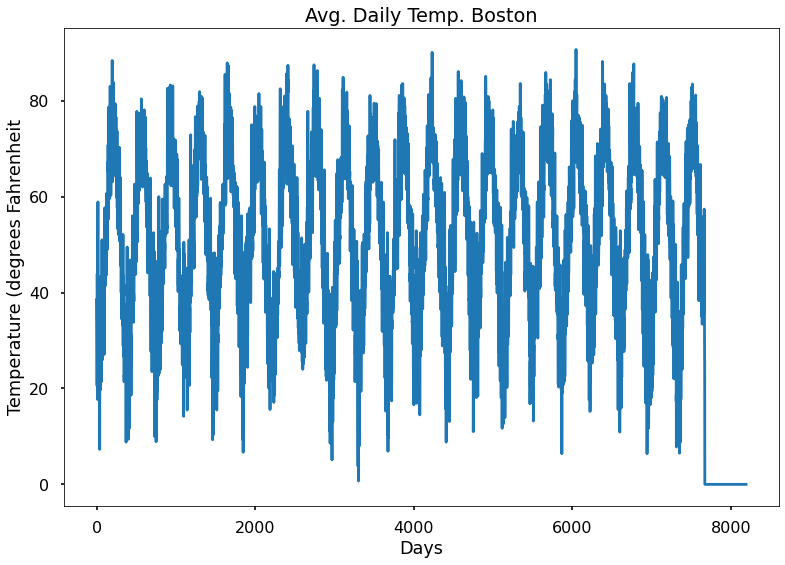

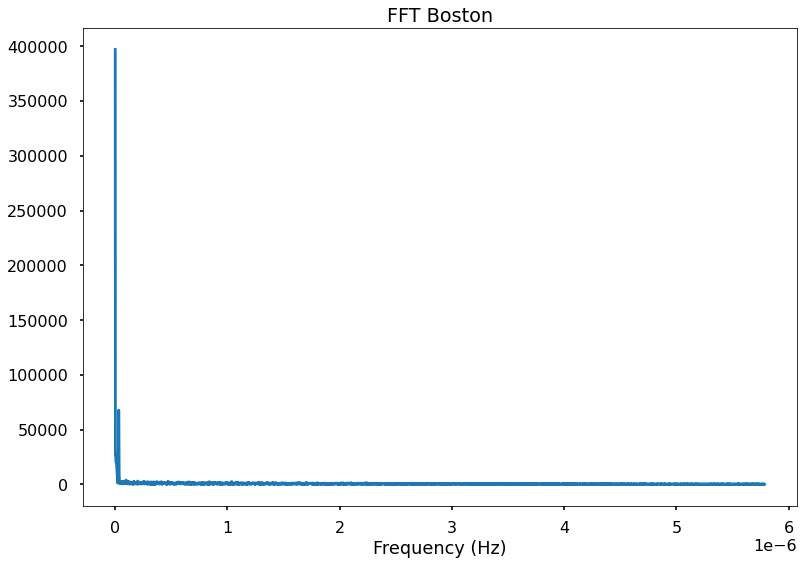

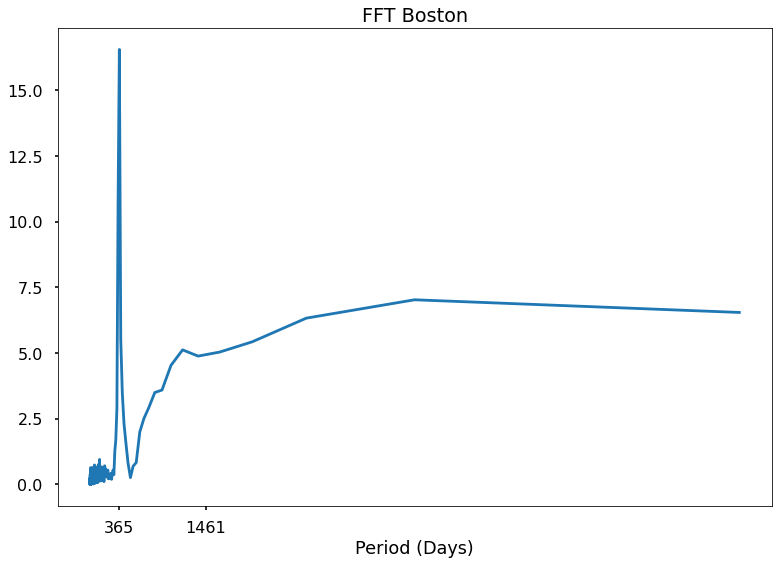

In [ ]:
###the same as above for Boston
plt.plot(boston)
plt.title("Avg. Daily Temp. Boston")
plt.xlabel("Days")
plt.ylabel("Temperature (degrees Fahrenheit")
plt.show()
###round up length to nearest power of 2
update_len=nearPowerOf2(len(boston))
for i in range(update_len-len(boston)):
  boston.append(0)
###apply fft
fftdata = FFT(boston)
###plot fft
plt.plot(half_freq, np.abs(fftdata[:halfn]))
plt.title("FFT Boston")
plt.xlabel("Frequency (Hz)")
plt.show()
###plot with new frequency
plt.plot(Tnew, np.abs(fftdata[:halfn])/halfn)
plt.xticks([365.25,365.25*4])
plt.title("FFT Boston")
plt.xlabel("Period (Days)")
plt.show()

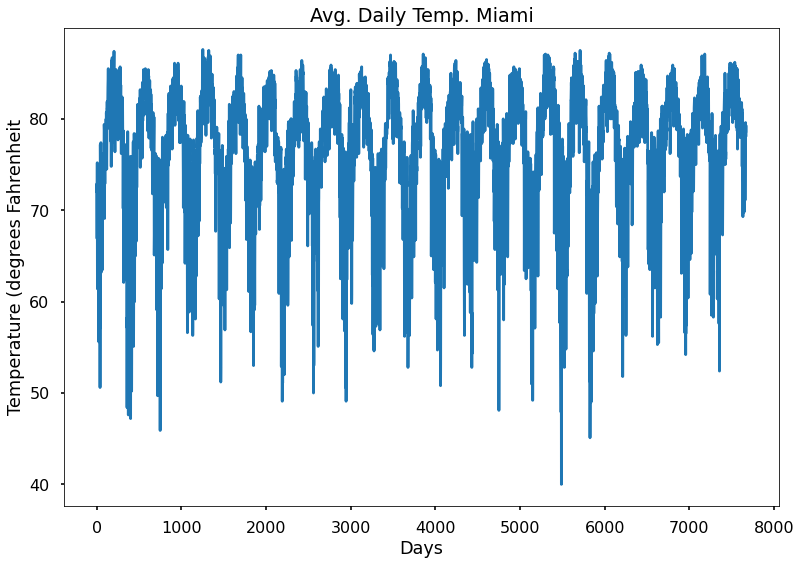

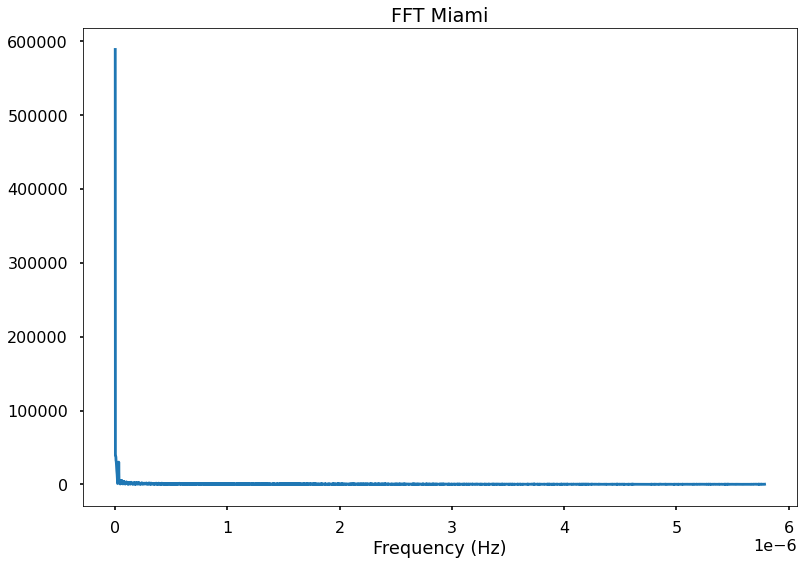

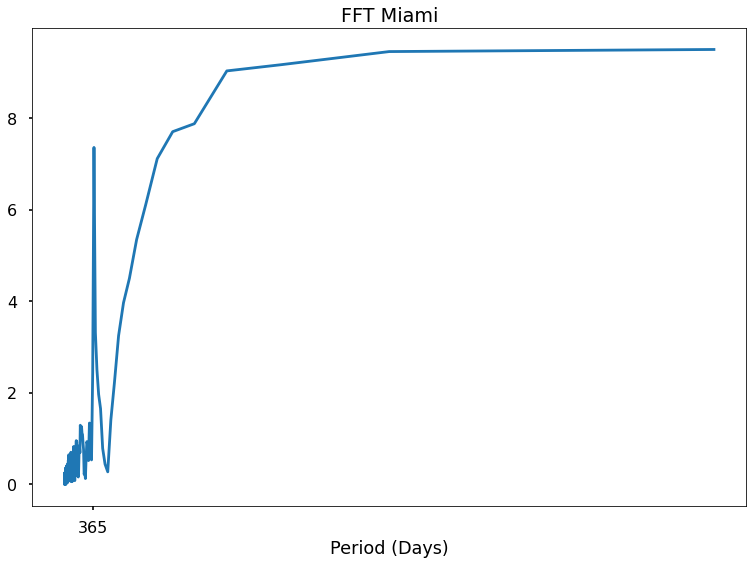

In [ ]:
###the same as above for Miami
plt.plot(miami)
plt.title("Avg. Daily Temp. Miami")
plt.xlabel("Days")
plt.ylabel("Temperature (degrees Fahrenheit")
plt.show()
###round up length to nearest power of 2
update_len=nearPowerOf2(len(miami))
for i in range(update_len-len(miami)):
  miami.append(0)
###apply fft
fftdata = FFT(miami)
###plot fft
plt.plot(half_freq, np.abs(fftdata[:halfn]))
plt.title("FFT Miami")
plt.xlabel("Frequency (Hz)")
plt.show()
###plot with new frequency
plt.plot(Tnew, np.abs(fftdata[:halfn])/halfn)
plt.xticks([365.25])
plt.title("FFT Miami")
plt.xlabel("Period (Days)")
plt.show()

Miami only has one peak at 365 days. This makes sense, since Miami tends to have more consistent weather, not experiencing as many unseasonably cold winters or hot summers, as compared to the rest of the US.

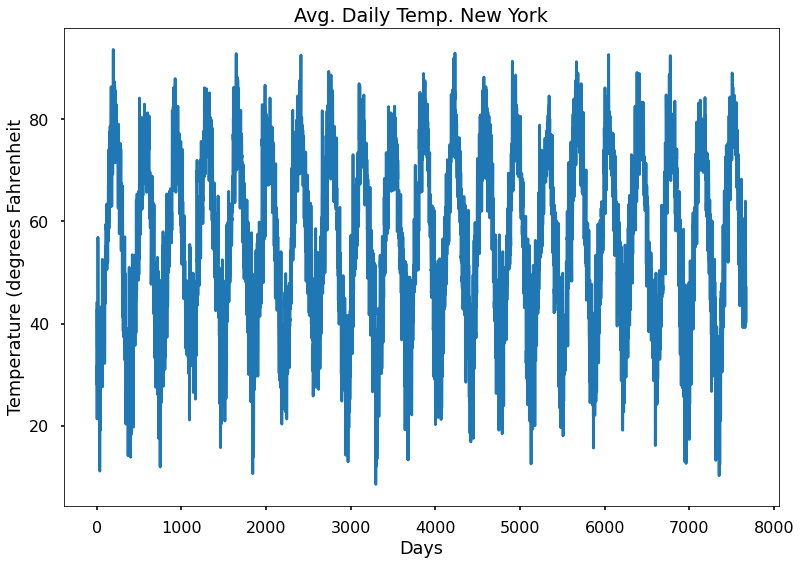

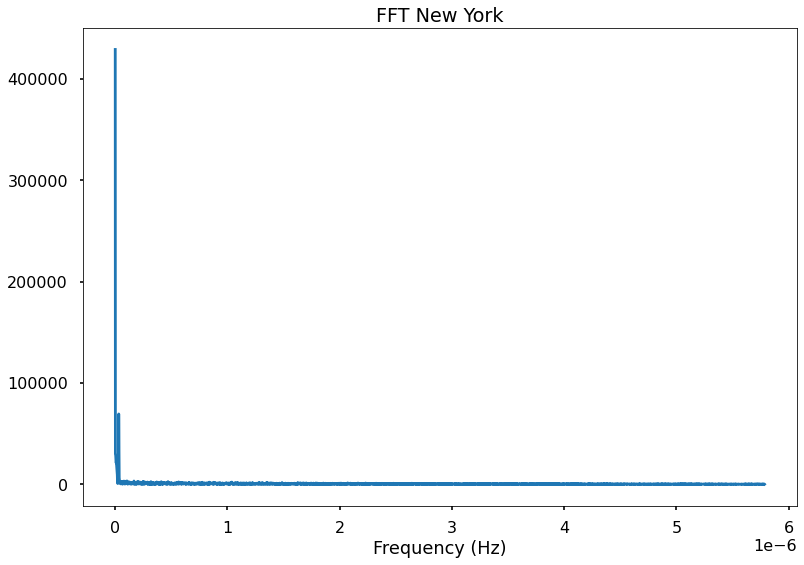

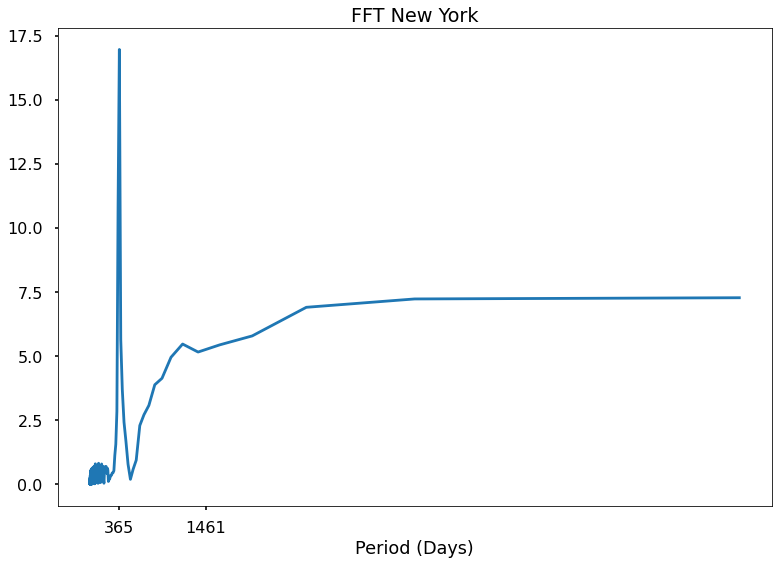

In [ ]:
###the same as above for New York
plt.plot(newyork)
plt.title("Avg. Daily Temp. New York")
plt.xlabel("Days")
plt.ylabel("Temperature (degrees Fahrenheit")
plt.show()
###round up length to nearest power of 2
update_len=nearPowerOf2(len(newyork))
for i in range(update_len-len(newyork)):
  newyork.append(0)
###apply fft
fftdata = FFT(newyork)
###plot fft
plt.plot(half_freq, np.abs(fftdata[:halfn]))
plt.title("FFT New York")
plt.xlabel("Frequency (Hz)")
plt.show()
###plot with new frequency
plt.plot(Tnew, np.abs(fftdata[:halfn])/halfn)
plt.xticks([365.25,365.25*4])
plt.title("FFT New York")
plt.xlabel("Period (Days)")
plt.show()

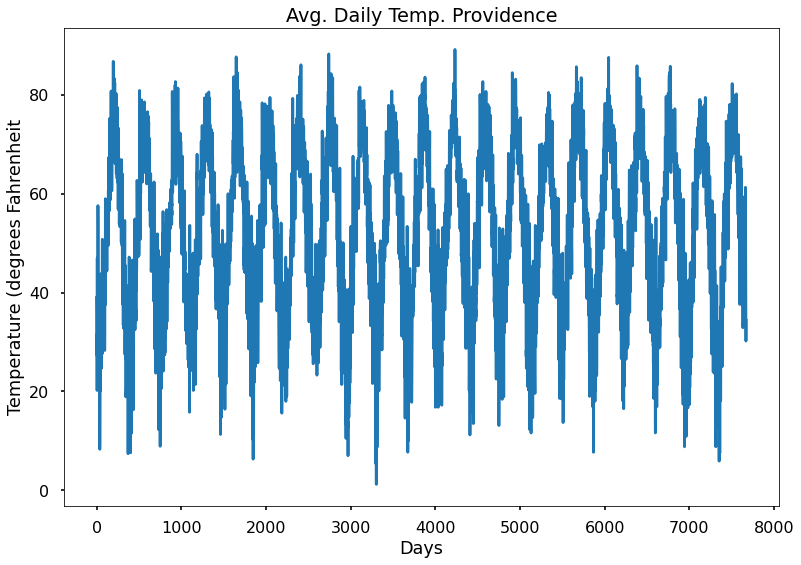

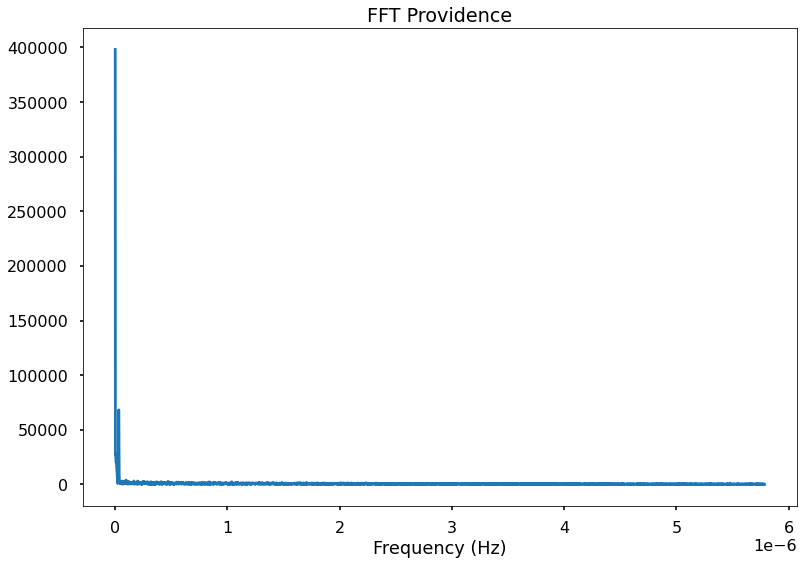

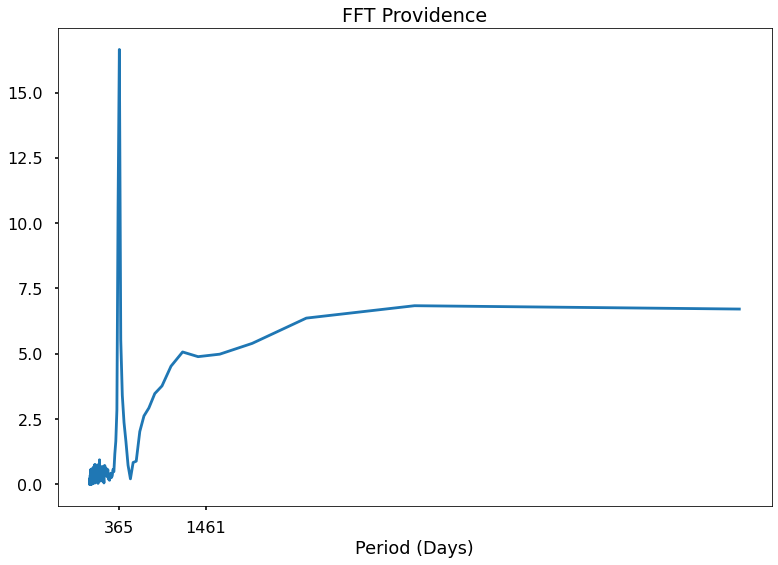

In [ ]:
###the same as above for Providence
plt.plot(providence)
plt.title("Avg. Daily Temp. Providence")
plt.xlabel("Days")
plt.ylabel("Temperature (degrees Fahrenheit")
plt.show()
###round up length to nearest power of 2
update_len=nearPowerOf2(len(providence))
for i in range(update_len-len(providence)):
  providence.append(0)
###apply fft
fftdata = FFT(providence)
###plot fft
plt.plot(half_freq, np.abs(fftdata[:halfn]))
plt.title("FFT Providence")
plt.xlabel("Frequency (Hz)")
plt.show()
###plot with new frequency
plt.plot(Tnew, np.abs(fftdata[:halfn])/halfn)
plt.xticks([365.25,365.25*4])
plt.title("FFT Providence")
plt.xlabel("Period (Days)")
plt.show()

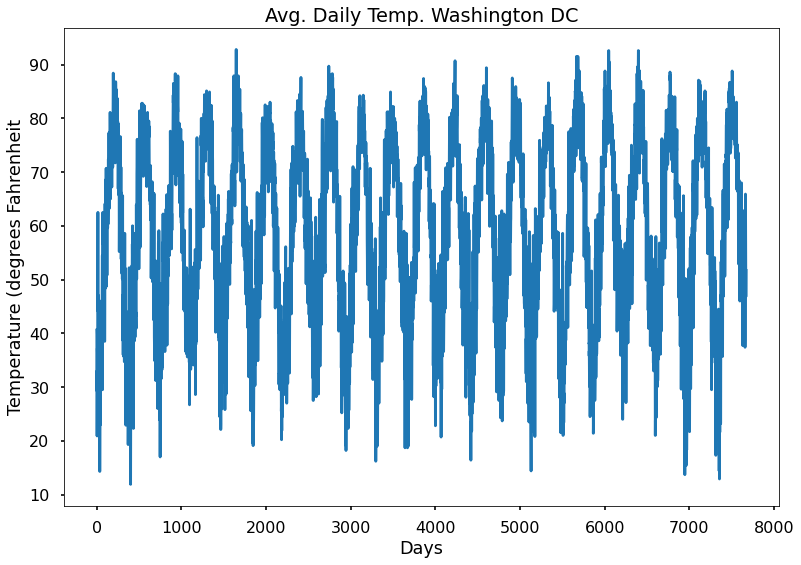

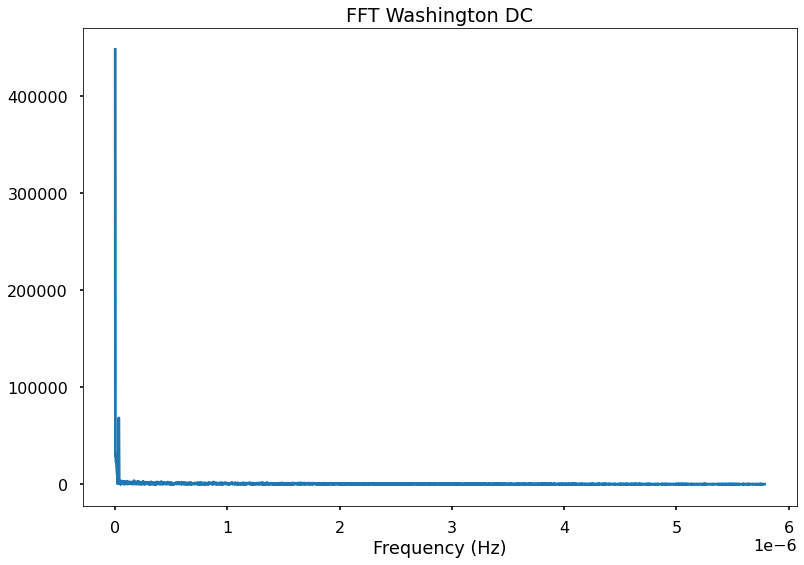

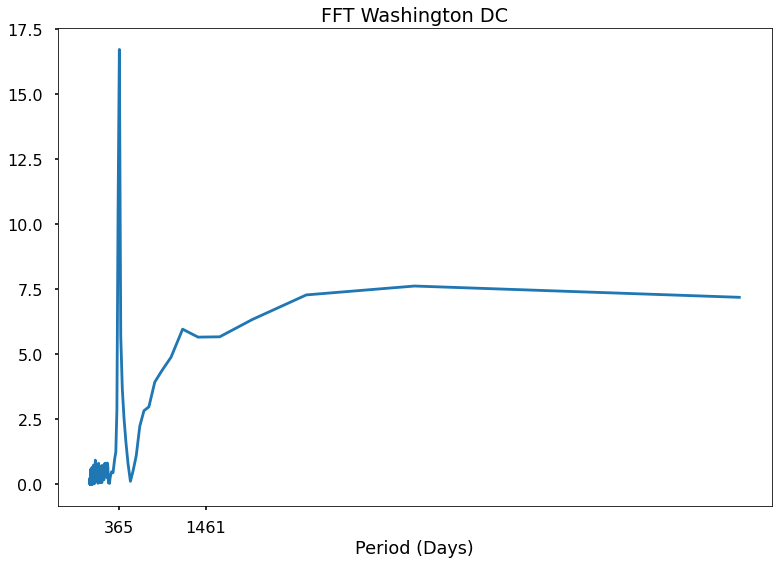

In [ ]:
###the same as above for Washington DC
plt.plot(dc)
plt.title("Avg. Daily Temp. Washington DC")
plt.xlabel("Days")
plt.ylabel("Temperature (degrees Fahrenheit")
plt.show()
###round up length to nearest power of 2
update_len=nearPowerOf2(len(dc))
for i in range(update_len-len(dc)):
  dc.append(0)
###apply fft
fftdata = FFT(dc)
###plot fft
plt.plot(half_freq, np.abs(fftdata[:halfn]))
plt.title("FFT Washington DC")
plt.xlabel("Frequency (Hz)")
plt.show()
###plot with new frequency
plt.plot(Tnew, np.abs(fftdata[:halfn])/halfn)
plt.xticks([365.25,365.25*4])
plt.title("FFT Washington DC")
plt.xlabel("Period (Days)")
plt.show()